## Context

Given datasets are from lovoo, a dating company. The main dataset of exploration will be *api_results*, which provides most of the information. Dataset *instances* won't be used. This is because the two datasets are very similar. Although *instances* has columns that *api_results* does not, the additional columns of data don't add much value for analysis. 

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import zipfile
import seaborn as sns

In [2]:
api_results = pd.read_csv("lovoo_v3_users_api-results.csv")
instances = pd.read_csv("lovoo_v3_users_instances.csv")

In [3]:
api_res = api_results.copy() 

In [4]:
api_res[["flirtInterests_chat", "flirtInterests_friends", "flirtInterests_date"]] = api_res[["flirtInterests_chat", "flirtInterests_friends", "flirtInterests_date"]].astype(int)

In [5]:
# api_results.head()

In [6]:
# api_res.dtypes

Need to swim around the data to get some understanding of what we're dealing with here. 

## Data exploration: What's the distribution of the different types of data collected? 

In [7]:
# for c in api_res.columns:
#     print(c)
#     print(api_res[c].unique())

In [8]:
# get ready to plot these columns
bars = ["genderLooking", "country"]
hists = ["age", "counts_pictures", "counts_profileVisits", "counts_kisses", "counts_fans", "lang_count"]
pies = ["flirtInterests_chat", "flirtInterests_friends", "flirtInterests_date", "isFlirtstar", "isHighlighted", "isInfluencer", "isMobile", "isNew", "isOnline", "isVip", "verified", "shareProfileEnabled"]

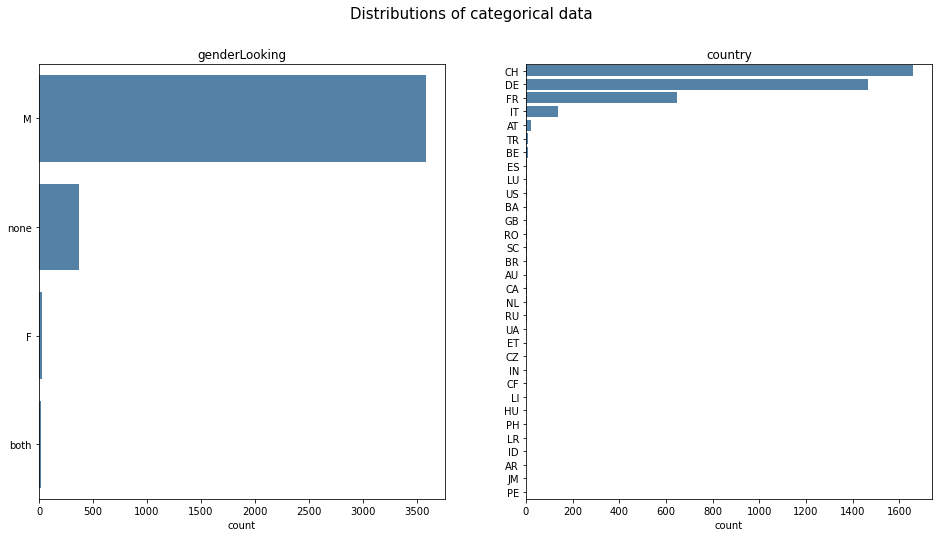

In [9]:
# barplots 
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 8))
for i in range(len(bars)):
    pos = i%2
    sns.countplot(ax = ax[pos], y = bars[i], data = api_res, order = api_res[bars[i]].value_counts().index, orient = "h", color = "steelblue").set_title(bars[i])
    ax[pos].set_ylabel('')
plt.suptitle("Distributions of categorical data", fontsize = 15)
plt.show()

### Insights: most users are looking for men, most users are from Switzerland

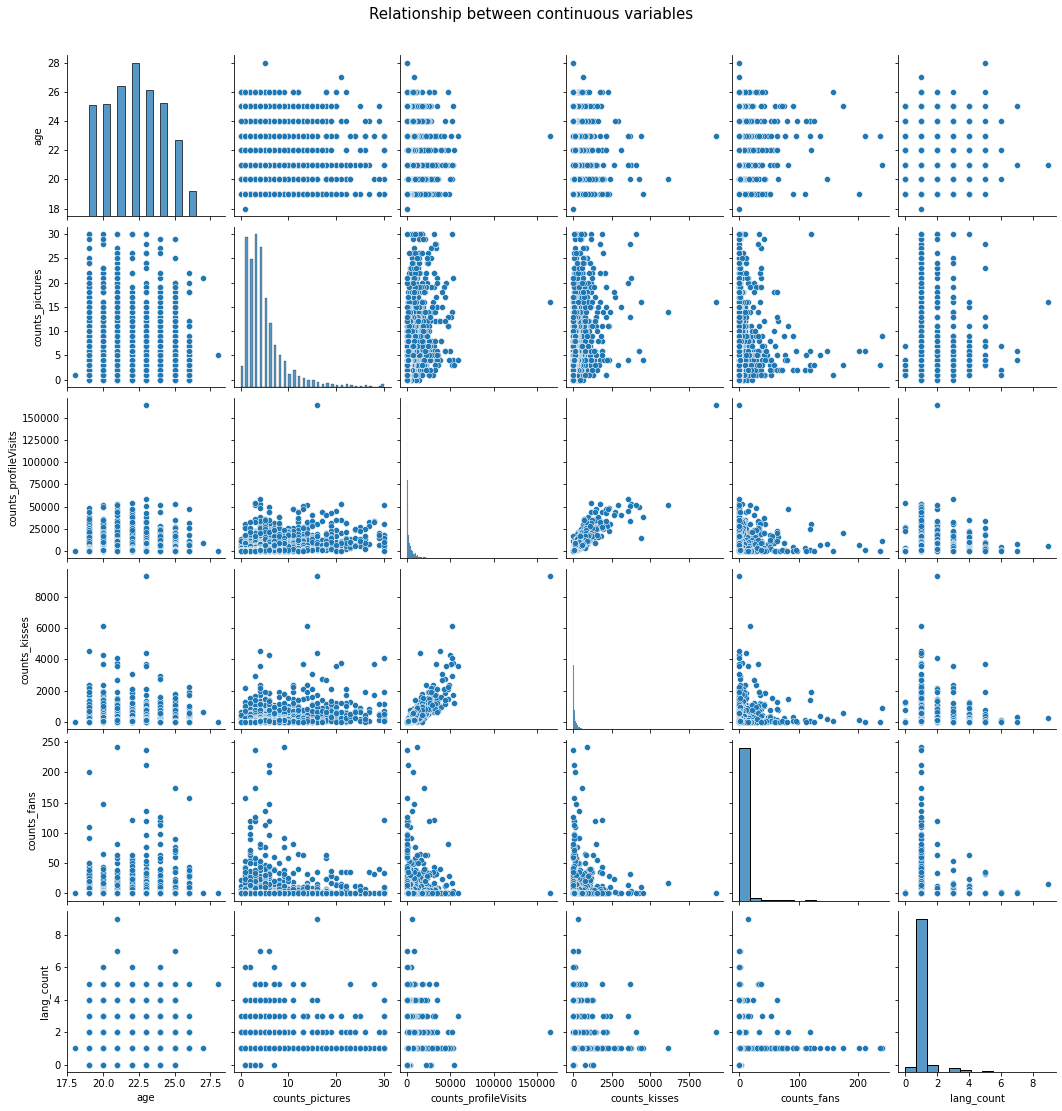

In [10]:
# pairplot to identify possible relationships
g = sns.pairplot(api_res[hists])
g.fig.suptitle("Relationship between continuous variables", y = 1.03, fontsize = 15)
plt.show()

In [11]:
np.corrcoef(api_res["counts_kisses"], api_res["counts_profileVisits"])

# correlation between them quite high

array([[1.        , 0.88561782],
       [0.88561782, 1.        ]])

### Insights: strong linear relationship between profileVisits and countKisses

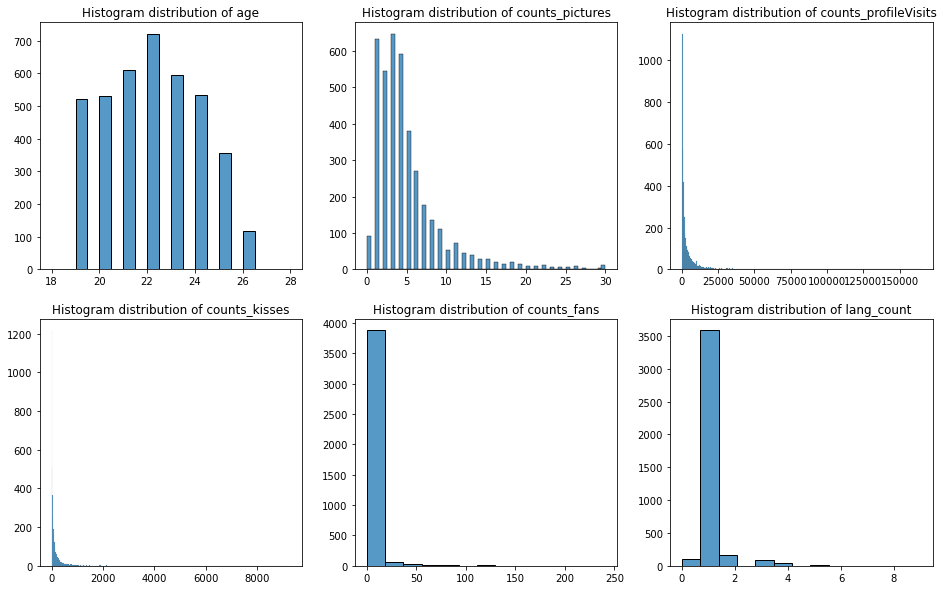

In [12]:
# histogram plots for greater clarity of distributions that pairplot couldn't give
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (16, 10))
for i in range(2):
    for j in range(3):
        sns.histplot(api_res[hists[3*i+j]], ax = ax[i][j]).set_title("Histogram distribution of " + hists[3*i+j])
        ax[i][j].set_ylabel("")
        ax[i][j].set_xlabel("")

### Insights: only young adults collected. most have 5 or below pictures of themselves. profileVisits and countKisses difficult to see, histograms are very skewed

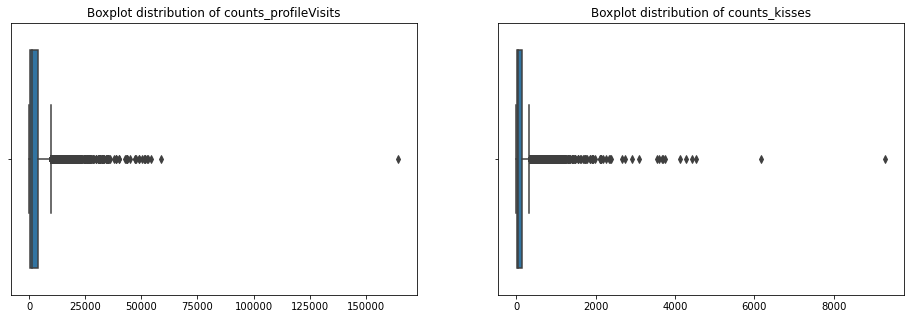

In [13]:
# see if boxplots help to check profileVisits and count_kisses
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 5))
sns.boxplot(x = api_res["counts_profileVisits"], ax = ax[0]).set_title("Boxplot distribution of counts_profileVisits")
ax[0].set_xlabel("")
sns.boxplot(x = api_res["counts_kisses"], ax = ax[1]).set_title("Boxplot distribution of counts_kisses")
ax[1].set_xlabel("")
plt.show()
# seems like there are quite a few outliers, which explains why the histograms were so spread out

In [14]:
# to get a rough sensing what a usual person will get for these 2 columns
print("median profile visits: " + str(api_res["counts_profileVisits"].median()))
print("median kisses: " + str(api_res["counts_kisses"].median()))

median profile visits: 1222.0
median kisses: 44.0


In [15]:
# check the deviations 
print("profileVisits standard deviation below median: " + str(np.std(api_res["counts_profileVisits"][api_res["counts_profileVisits"] <= 1222])))
print("profileVisits standard deviation above median: " + str(np.std(api_res["counts_profileVisits"][api_res["counts_profileVisits"] > 1222])))
print("counts_kisses standard deviation below median: " + str(np.std(api_res["counts_kisses"][api_res["counts_kisses"] <= 44])))
print("counts_kisses standard deviation above median: " + str(np.std(api_res["counts_kisses"][api_res["counts_kisses"] > 44])))

# users who are above median have a lot more deviation that those below median. 
# seems like users who are doing well must have certain tactics to attract others

profileVisits standard deviation below median: 351.64046494006783
profileVisits standard deviation above median: 8513.943541746228
counts_kisses standard deviation below median: 12.926348322230261
counts_kisses standard deviation above median: 495.2920882209063


### Insights: Deviations of those above median profileViews is high

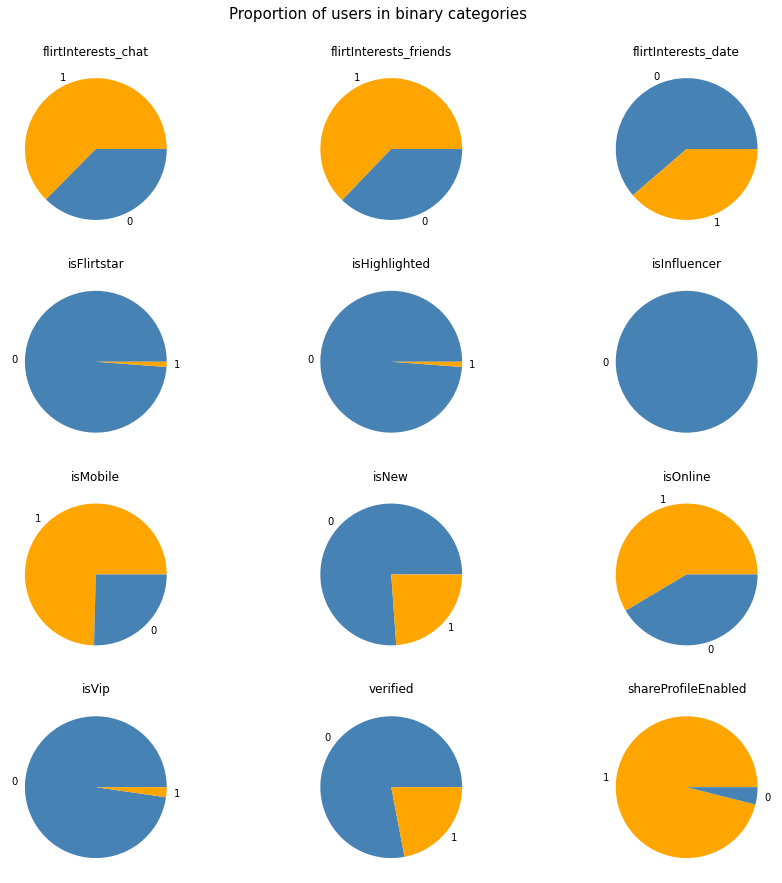

In [16]:
# piecharts 
col = {"0":"steelblue", "1":"orange"}
fig, ax = plt.subplots(nrows = 4, ncols = 3, figsize = (15, 15))
for i in range(4):
    for j in range(3):
        tmp = api_res[pies[3*i+j]].astype(str).value_counts().reset_index()
        labs_tmp = tmp.iloc[:,0]
        val_tmp = tmp.iloc[:,1]
        ax[i][j].pie(x = val_tmp, labels = labs_tmp, colors = labs_tmp.map(col))
        ax[i][j].set_title(pies[3*i+j])
plt.suptitle("Proportion of users in binary categories", y = 0.93, fontsize = 15)
plt.show()

### Insights: There are no influencers. About 3/5: are available on chat and as friends. More than 1/2 not interested in dating. About 3/4 are not new users, use the mobile app and are not verified. Almost all don't use highlights, share their profiles, and are not vips

### Summary thus far:

From the barcharts:
- Most users look for men
- Most users come from Switzerland (CH), Germany (DE), France (FR), Italy (IT)

From the scatterplots:
- More profileVisits -> more countKisses

From the histograms and boxplots:
- There's quite a few profiles that lie outside the average. They receive a lot more profileVisits and kisses, and the deivation between them is also quite high. This suggests that whatever these users are doing different from the rest ... they're doing it right

From the piecharts:
- About 3/5 are available on chat, friends
- No influencers
- Almost everyone shares their profiles but they don't use highlights and are not vips
- 3/4 are not new users, not verified, use the mobile app
- More than half not interested in dating 

The number of kisses / likes seems like the best available feature to measure a user's performance, so we could treat counts_kisses as the primary target variable to investigate. However, as seen before, profiles are likely to have more kisses if they are visited more often, which makes sense since people can only like what they've seen and understood. So the main variable of investigation can also be counts_profileVisits. I will treat counts_profileVisits as the target variable of investigation here
 
## Main query: how can a profile get more visits?

In [17]:
# extract relevant columns from the dataframe 
col2 = ["counts_pictures", "counts_profileVisits", "counts_fans", "flirtInterests_chat", "flirtInterests_friends", "flirtInterests_date", "isHighlighted", "isMobile", "isNew", "isVip", "verified", "shareProfileEnabled"]
api_res2 = api_res.copy() 
api_res2 = api_res2[col2]

api_res2["more_than_median_visits"] = api_res2["counts_profileVisits"] > 1222 # identify those who are more than median in profile views
api_res2["more_than_median_visits"] = api_res2["more_than_median_visits"].astype(int) # convert to integer to make analysis more uniform

In [18]:
# build a dataframe from the dictionary
api_res3 = {"more_than_median_visits":[0,1]} 

for c in col2: 
    api_res3[c] = []
    tmp = api_res2[["more_than_median_visits", c]]
    tmp = tmp.groupby("more_than_median_visits").mean().reset_index()
    tmp["percent"] = tmp[c]/tmp[c].sum()
    api_res3[c].extend(tmp["percent"].tolist())

In [19]:
api_res3 = pd.DataFrame(api_res3) 
api_res3 = api_res3.melt(id_vars = ["more_than_median_visits"], var_name = "category") # reshape dataframe

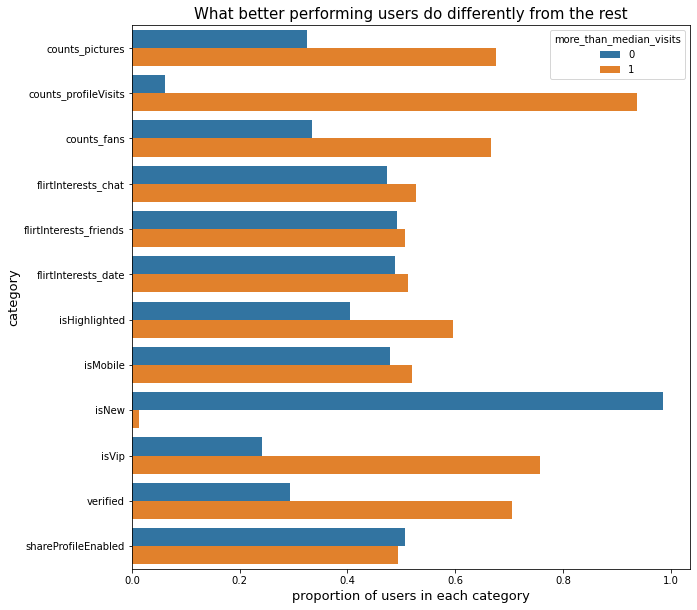

In [22]:
fig, ax = plt.subplots(figsize = (10, 10))
sns.barplot(y = "category", x = "value", data = api_res3, hue = "more_than_median_visits")
plt.xlabel("proportion of users in each category", fontsize = 13)
plt.ylabel("category", fontsize = 13)
plt.title("What better performing users do differently from the rest", fontsize = 15)
plt.show()


# some notable differences between those who have more than median visits:
# more pictures, more fans, highlight themselves, are experienced users, are vips, are verified

### Insights: Seems like the main factors influencing views are number of pictures, experience, vip status and verification

## Main insights: 

1) Those who do very well tend to make use of the app's extra features, know their way around the app, and take lots of pictures of themselves. 

2) Beginners don't do very well.

3) The app's features that help to promote an individual can prove to be quite useful.

4) Most who use the app understand that being more open (availing themselves on chat, being friends...etc) helps their chances of being identified. 

Recommendations: 

1) The app could lend more aid to the beginners to help promote themselves better. In addition to a guide / some intial tips, an incentive could be provided to encourage beginners to use the app more often. This could alleviate the problem of inexperience. 

2) For some reason (could be pricing), not many are using the app's premium features, which seems to be a plausible reason as to why a large number of profiles are not being visited often. If price is the main reason, lowering the price could help. However, this comes at the expense of the exclusive benefits that premium users hold, lowering the attractiveness of going premium. An alternative solution could be to create different premium tiers. As tiers increase, user has to pay more, but gains more access to being promoted.

Weaknesses of analysis: 

1) Unsure if there's an algorithm that increases one's visibility based on their number of views. If there is such as thing, we don't know if number of profile views have been manipulated to give a user an edge in being viewed.

2) No access to the type of pictures posted. Types of images posted can influence judgement and can therefore play a big role in determining whether one's profile is liked.

One last analysis would be to understand why people don't verify and think about what could be done about it. From lovoo's instructions on the verification process, one needs to upload a photo of themselves with additional information written on a slip of paper.  

In [21]:
api_res4 = api_res.copy()
api_res4 = api_res4[["verified", "counts_pictures"]]
api_res4 = api_res4.groupby(["verified"]).mean().reset_index()
api_res4.columns = ["verified", "mean_count_pictures"]
api_res4

,verified,mean_count_pictures
0,0,4.219332
1,1,6.798405


From the above, we see that those who aren't verified have a decent number of pictures uploaded. This means that the problem isn't a lack of understanding of how the app works, but that users don't see the significance of verifying themselves. Either that, or instructions to verify / benefits of verification weren't conveyed effectively enough

Recommendations:

3) More effective ways of prompting users to verify themselves. Or perhaps, make verification mandatory.